In [4]:
import sys 
import os 
import typing as tp 
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
sys.path.append(os.path.abspath('..'))

In [8]:
base_data_dir: Path = Path('..').resolve() / 'data'
data_dir: Path = base_data_dir / 'models'
plots_dir: Path = base_data_dir / 'plots'
data_dir.exists()

True

In [20]:
result_dfs: list[pd.DataFrame] = []

for mc_fp in (data_dir / 'MonteCarlo').iterdir():
    if mc_fp.suffix == '.mdl':
        continue 
    df: pd.DataFrame = pd.read_csv(mc_fp)
    df['model'] = 'Monte Carlo'
    df['model_num'] = int(str(mc_fp)[-5])
    result_dfs.append(df)
    
for q_fp in (data_dir / 'QAgent').iterdir():
    if q_fp.suffix == '.mdl':
        continue 
    df: pd.DataFrame = pd.read_csv(q_fp)
    df['model'] = 'Q-Learning'
    df['model_num'] = int(str(q_fp)[-5])
    result_dfs.append(df)
    
for s_fp in (data_dir / 'SARSA').iterdir():
    if s_fp.suffix == '.mdl':
        continue 
    df: pd.DataFrame = pd.read_csv(s_fp)
    df['model'] = 'SARSA'
    df['model_num'] = int(str(s_fp)[-5])
    result_dfs.append(df)
result_df: pd.DataFrame = pd.concat(result_dfs)
result_df['model_id'] = result_df[['model', 'model_num']].apply(lambda r: f'{r.model}-{r.model_num}', axis=1)
result_df

,perc_states_visited,total_gain,win_rate,did_win,path_length,episode,model,model_num,model_id
0,0.105263,-9.999115,0.000000,False,83,0,Monte Carlo,5,Monte Carlo-5
1,0.315789,-19.999115,0.000000,False,164,1,Monte Carlo,5,Monte Carlo-5
2,0.377193,-29.999115,0.000000,False,280,2,Monte Carlo,5,Monte Carlo-5
3,0.383041,-39.860051,0.000000,False,35,3,Monte Carlo,5,Monte Carlo-5
4,0.388889,-49.860051,0.000000,False,361,4,Monte Carlo,5,Monte Carlo-5
...,...,...,...,...,...,...,...,...,...
49995,0.818713,-232633.913830,0.950876,True,12,49995,SARSA,8,SARSA-8
49996,0.818713,-232637.683654,0.950877,True,10,49996,SARSA,8,SARSA-8
49997,0.818713,-232642.447211,0.950878,True,12,49997,SARSA,8,SARSA-8
49998,0.818713,-232646.217034,0.950879,True,10,49998,SARSA,8,SARSA-8


<Axes: xlabel='episode', ylabel='perc_states_visited'>

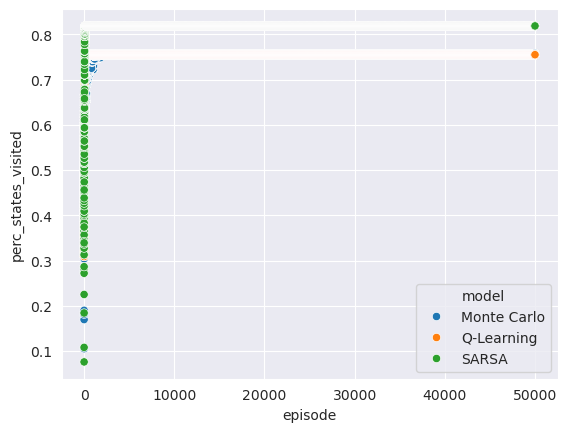

In [21]:
sns.scatterplot(data=result_df, x='episode', y='perc_states_visited', hue='model')

<Axes: xlabel='episode', ylabel='win_rate'>

/home/duke_trystan/miniconda3/envs/Reinforcement Learning/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/duke_trystan/miniconda3/envs/Reinforcement Learning/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


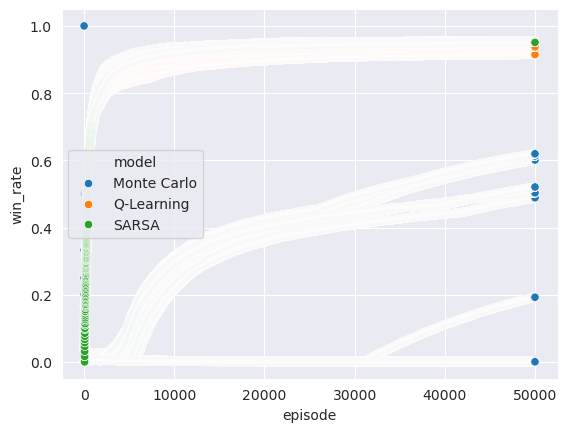

In [22]:
sns.scatterplot(data=result_df, x='episode', y='win_rate', hue='model')